In [1]:
# Installing the required packages
!pip3 install pandas
!pip3 install sklearn
!pip3 install seaborn
!pip3 install mlxtend
!pip3 install bokeh
!pip3 install pandas-bokeh

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-co

In [38]:
# Importing the required packages
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Loading the historical data
df = pd.read_csv("knn_historical_data_202201302007.csv",usecols=["water_temperature","tds_level","ph_level","target"])
df.head()

,water_temperature,tds_level,ph_level,target
0,18.20,751.0,9.3,25
1,26.92,689.0,7.2,7
2,18.65,557.0,7.0,22
3,27.70,818.0,5.8,9
4,14.86,958.0,4.5,11


<AxesSubplot:xlabel='water_temperature'>

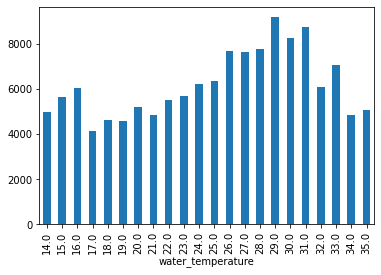

In [18]:
# Visualizing the range of water temperature
df["water_temperature"].groupby((df["water_temperature"]//1)*1).sum().plot.bar()

<AxesSubplot:xlabel='tds_level'>

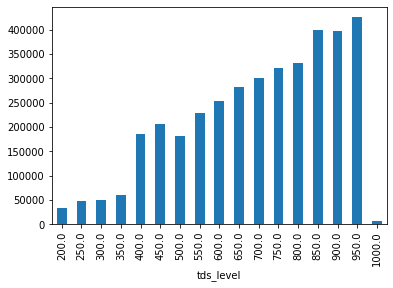

In [16]:
# Visualizing the range of water tds level
df["tds_level"].groupby((df["tds_level"]//50)*50).sum().plot.bar()

<AxesSubplot:xlabel='ph_level'>

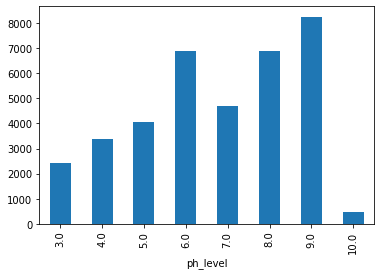

In [20]:
# Visualizing the range of water pH level
df["ph_level"].groupby((df["ph_level"]//1)*1).sum().plot.bar()

<AxesSubplot:xlabel='target'>

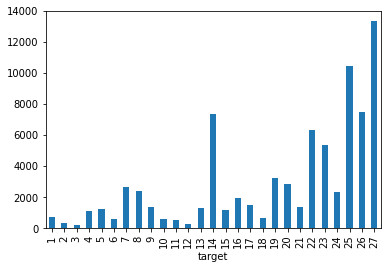

In [21]:
# Visualizing the range of target levels
df["target"].groupby((df["target"]//1)*1).sum().plot.bar()

In [24]:
# Scaling the data points
ss = StandardScaler()
X =  pd.DataFrame(ss.fit_transform(df.drop(["target"],axis = 1),),columns=['water_temperature', 'tds_level', 'ph_level'])
y = df["target"]

In [25]:
# Test Train split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [26]:
# Fitting the knn model
test_scores = []
train_scores = []

for i in range(1,20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [28]:
# Evaluating the k value on training dataset
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [29]:
# Evaluating the k value on testing dataset
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 90.4170363797693 % and k = [3, 5]


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


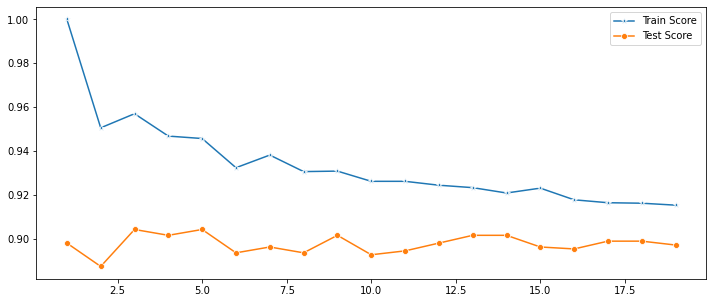

In [30]:
# Visulalizing the training an testting score
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,20),test_scores,marker='o',label='Test Score')

In [31]:
# Setup a knn classifier with k = 5 neighbors
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.904170363797693

In [32]:
# Saving the weights in pickle file
knnPickle = open('knnpickle_file', 'wb')
pickle.dump(knn, knnPickle)                      

In [33]:
# Load the model from disk
loaded_model = pickle.load(open('knnpickle_file', 'rb'))
result = loaded_model.predict(X_test)

In [35]:
# Evaluate the KNN model
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
cross_tab_df = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

In [36]:
# Saving confusion matrix to csv
cross_tab_df.to_csv("confusion.csv")

Text(0.5, 15.0, 'Predicted label')

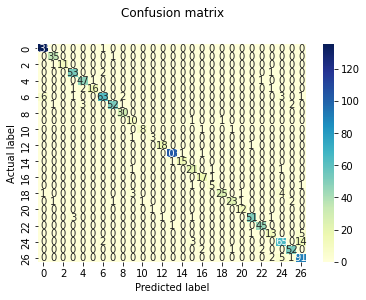

In [37]:
# Ploting the confusion matrix
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
# Generating classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       136
           2       0.92      0.97      0.95        36
           3       1.00      0.92      0.96        12
           4       0.91      0.95      0.93        56
           5       0.90      0.96      0.93        49
           6       0.94      0.80      0.86        20
           7       0.93      0.83      0.88        76
           8       0.96      0.88      0.92        59
           9       0.91      1.00      0.95        30
          10       0.67      0.83      0.74        12
          11       0.89      0.80      0.84        10
          12       0.75      0.75      0.75         4
          13       0.95      0.95      0.95        19
          14       0.98      0.98      0.98       105
          15       0.94      0.94      0.94        16
          16       0.78      0.88      0.82        24
          17       0.81      0.94      0.87        18
          18       0.71    

In [42]:
# Performing Grid search
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8977817213842059
Best Parameters: {'n_neighbors': 3}


In [43]:
knn = KNeighborsClassifier(3)

knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9569653948535937
0.904170363797693
